In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datatypes

# The Text data type 
# str
x_1 = "Hello Class!"

# The Numeric Types
# int
x_2 = 3311          
#float
x_3 = 3311.5
#complex
x_4 = 3311 + 1j


# The Sequence Types 
#list
x_4 = ["3311", "3311.5", "3311 + 1j"]
#tuple
x_5 = ("3311", "3311.5", "3311 + 1j")
#range
x_6 = range(6)

# Basic operations
x = 3
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"

# Print the type ofthe variable x_1 
print(type(x_1))
# You can also print the legnth of a list/tuple using
print(len(x_4))

4
2
6
9
<class 'str'>
3


In [4]:
# For Loops in python 

# Here are 3 different ways you can use for loops in python
# Say we need a for loop to loop over 0, 0.1, 0.2, ..., 1 and store them in a list called value


values = []               # initialize an empty list
for i in range(10):
    values.append(i*0.1)  # appending values to the empty list

# Shorter version using list comprehension (same as the loop above)
values = [i*0.1 for i in range(11)]

for value in values:
    # DO something with "value"
    # Something like
    value = value + 1


In [5]:
# Functions in python

# The basic structure of function in python goes as follows
def func(x1, x2, x3):
    #  Function name: func  , Input params: x1, x2, x3
     
    # ...... processing .........
    
    # return variable r 
    return r


# Here is an example function ( combines loops and conditions)

def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
    

negative
zero
positive


In [6]:
#  Numpy

#We can convert any list into  a numpy array using
x = np.array(x_4)   # remember that x_4 is a list 
print(x)
print(type(x))

# Create n-dimensional arrays of zeros and ones using 
zeros_arr = np.zeros((1,7))     # creates a 1D array of zeros with 1 row and  coloumns
ones_arr = np.ones((3,3))       # creates a 2D array of Ones with  3 rows and 3 coloumns


# Data types in Numpy
x = np.array([1, 2])       # Let numpy choose the datatype
print(x.dtype)             # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype --> aslo called type casting
print(x.dtype)                         # Prints "int64"


# Basic elementwise operations using numpy arrays
x = np.arange(9)
y = np.ones((1,9))

print(np.add(x, y))        # Elementwise sum
print(np.subtract(x, y))   # Elementwise difference
print(np.multiply(x, y))   # Elementwise product
print(np.divide(x, y))     # Elementwise division


['3311' '3311.5' '3311 + 1j']
<class 'numpy.ndarray'>
int64
float64
int64
[[1. 2. 3. 4. 5. 6. 7. 8. 9.]]
[[-1.  0.  1.  2.  3.  4.  5.  6.  7.]]
[[0. 1. 2. 3. 4. 5. 6. 7. 8.]]
[[0. 1. 2. 3. 4. 5. 6. 7. 8.]]


In [7]:
# Convolution 


# The Naive way, using for loop
# Design a function which computes linear convolution of two signals (f and g) and returns the convolved output

def direct_conv(f,g):
    N1 = len(f)
    N2 = len(g)
    N = N1 + N2 - 1
    
    #place holder for the output
    y = np.zeros(N)
    
    m = N-N1
    n = N-N2    
    #Padding zeros to x and h to make their length to N
    f =np.pad(f,(0,m),'constant')
    g =np.pad(g,(0,n),'constant')

    #Linear convolution using convolution sum formula
    for n in range (N):
        for k in range (N):
            if n >= k:
                 y[n] = y[n]+f[n-k]*g[k]
                    
    return y

f = [ 0,  0,  1,  1,  0, 0 ]
g = [ 1, -1,  0,  0, -1, 1 ]

conv_out = direct_conv(f,g)
print(conv_out)

[ 0.  0.  1.  0. -1.  0. -1.  0.  1.  0.  0.]


In [8]:
#Using Scipy conv function for convolving 2 signals
from scipy import signal

scipy_conv_out = signal.convolve(f, g, mode='full') 
print(scipy_conv_out)

[ 0  0  1  0 -1  0 -1  0  1  0  0]


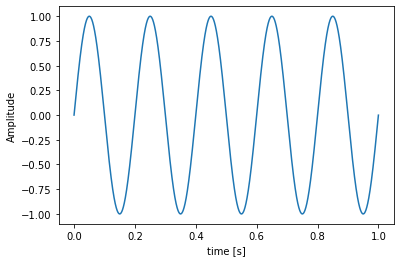

In [9]:
# Let's do some basic siganl processing


# Design a python function which takes Natural frequency (f), Sampling frequency (Fs), and time(t) to generate
# a sinusoidal signal and plots the signal using matplotlib

# Hint - use np.sin()

# Also, make sure you lable the x and y axes of your plots!

# Bonus: Try to design the function such that if you do not supply any inputs, it should use default values of 
# f = 10 Hz, Fs = 44.1 kHz and t = 0.5 secs

def Sinusoid(f, Fs, t):
    
    T = 1/Fs                # sampling period
    N = Fs*t                # Total No.of points in the signal
    omega = 2*np.pi*f    # angular frequency for sine waves
    
    t_vec = np.arange(N)*T  # time vector for plotting
    y = np.sin(omega*t_vec)
    
    plt.plot(t_vec,y)
    plt.ylabel('Amplitude')
    plt.xlabel('time [s]')
    plt.show()
    
    return y
    

# Signal params
f = 5      # 50 Hz Natural freq
Fs = 44100  # Sampling freq 
t = 1      # seconds of sampling

sig = Sinusoid(f, Fs, t)





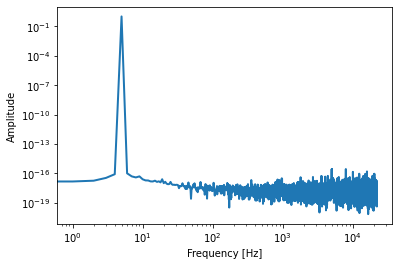

In [10]:
# fourier transform and frequency domain

# Now, use the sinusoid generated from the previous exercise and design a function to compute the FFT of the signal
# using " np.fft.fft()" function and plot the magnitude response using pyplot on a log scale
 
# Note that the FFT gives u a double sided spectrum (i.e - N/2 to N/2),but we only 
# need one side of it ( i.e 0 to N/2)


def FFT_func(y, N):
    Y_k = np.fft.fft(y)[0:int(N/2)]/N  # FFT function from numpy
    Y_k[1:] = 2*Y_k[1:]                # need to take the single-sided spectrum only
    Pxx = np.abs(Y_k)                  # be sure to get rid of imaginary part
    f = Fs*np.arange((N/2))/N;         # frequency vector for plotting
    
    # plotting
    fig,ax = plt.subplots()
    plt.plot(f,Pxx,linewidth=2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
    plt.show()
    
N = Fs*t       
FFT_func(sig, N)

In [11]:
# Saving your signals in audio files (.wav)


import wave, struct

file = "sine.wav"

# saving paramaters
nframes   =  N
comptype  = "NONE"
compname  = "not compressed"
nchannels =  1
sampwidth =  2 

wav_file=wave.open(file, 'w')
wav_file.setparams((nchannels, sampwidth, int(Fs), nframes, comptype, compname))

amplitude = 10000  # multiplying with a fixed constant to boos the volume of the signal

for s in sig:
   wav_file.writeframes(struct.pack('h', int(s*amplitude))) 
   # In this step, we multiply each sample with the amplitude to convert the floating point
   # sinusoid to a fixed point sinusoid

